# Emerging Technologies Project

## Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

## Research
### Machine Learning
Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the premise that, with minimal human interaction, systems can learn from data, recognize trends and make decisions [1].

In data science, an algorithm is a series of steps for statistical processing. In machine learning, algorithms are "trained" to identify patterns and features for a large number of quantities of data to make new data-based decisions and predictions. The better the algorithm, the more accurate the decisions and predictions will become as it processes more data [1].

### How Machine Learning Works
There are four steps for building a machine learning application (or model) [1].

**Step 1: Select and prepare a training data set** \
Training data is a data set representative of the data that the machine learning model would use to solve the problem it is programmed to solve. In certain instances, training data is labelled data—"tagged" to identify the features and classifications that the model would need to identify. Other data is unlabelled, and the model will need to extract those features and assign classifications on its own.

In either case, the training data needs to be properly prepared—randomized, de-duped and reviewed for imbalances or prejudices that could impact the training. It can also be divided into two subsets: the training subset used to train the application, and the assessment subset used to evaluate and refine the application.

**Step 2: Choose an algorithm to run on the training data set** \
The type of algorithm depends on the type (labelled or unlabelled) and amount of data in the training data set and on the type of problem to be solved. Machine learning algorithms for labelled data include:

**Regression algorithms -** Linear and logistic regression are examples of regression algorithms used to understand relationships in data. Linear regression is used to predict the value of a dependent variable based on the value of an independent variable. Logistic regression is used when the dependent variable is binary in nature.

**Decision trees -** Decision trees use classified data to make recommendations based on a set of decision rules.

**Instance-based algorithms -** An example of an instance-based algorithm is K-Nearest Neighbor or k-nn. It uses classification to estimate how likely a data point is to be a member of one group or another based on its proximity to other data points.

Machine learning algorithms for unlabelled data include:

**Clustering algorithms -** Clustering focuses on identifying groups of similar records and labelling the records according to the group to which they belong. This is done without prior knowledge about the groups and their characteristics. Types of clustering algorithms include the K-means, TwoStep, and Kohonen clustering.

**Association algorithms -** Association algorithms find patterns and relationships in data and identify frequent "if-then" relationships called association rules. These are similar to the rules used in data mining.

**Neural networks -** A neural network is an algorithm that defines a layered network of calculations featuring an input layer, where data is ingested; at least one hidden layer, where calculations are performed make different conclusions about input; and an output layer. where each conclusion is assigned a probability. A deep neural network is a network with multiple hidden layers, each of which successively refines the results of the previous layer.

**Step 3: Training the algorithm to create the model** \
Training the algorithm is an iterative process. It involves running variables through the algorithm, comparing the output with the results it should have produced, adjusting weights and biases within the algorithm that might yield a more accurate result, and running the variables again until the algorithm produces the correct result most of the time. The resulting trained, accurate algorithm is the machine learning model.

**Step 4: Using and improving the model** \
The model is used with new data to improve its accuracy effectiveness. For example, a machine learning model designed to identify spam will ingest email messages, while a machine learning model that drives a robot vacuum cleaner will ingest data resulting from real-world interaction with moved furniture or new objects in the room.

### Supervised Machine Learning
Supervised machine learning trains itself on a labelled data set. The data is labelled with information that the machine learning model can determine the ways in which the model classifies the data. Supervised machine learning requires less training data than other machine learning methods and makes training simpler, since the outputs of the model can be compared to the actual labeled results [1].

### Unsupervised Machine Learning
Unsupervised machine learning uses unlabelled data. It uses algorithms to extract meaningful features needed to label, sort and classify the data in real-time and without human intervention. Unsupervised learning is less about automating decisions and predictions but more about identifying patterns and relationships in data [1].



## Code

In [385]:
import numpy as np
import statsmodels.stats.weightstats as stat
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import csv
from numpy.polynomial.polynomial import polyfit
from statistics import mean
import sklearn.cluster as skcl

In [371]:
speedPowerFile = "powerproduction.csv"
speedPower = pd.read_csv(speedPowerFile)

speedValues = []
powerValues = []

print("Total for the speed column", speedTotal)
print("Total for the power column", powerTotal)

speedPower.describe()

# Line of best fit https://stackoverflow.com/a/31800660.

Total for the speed column 6295.198999999994
Total for the power column 24007.292


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [372]:
print(speedPower.shape)
speedPower

(500, 2)


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


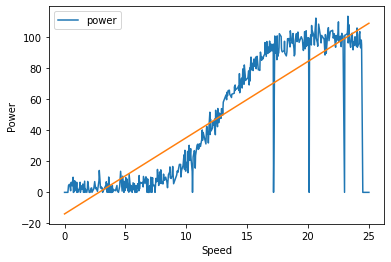

In [422]:
speedPower.plot(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]))
plt.xlabel("Speed")
plt.ylabel("Power")
plt.show()

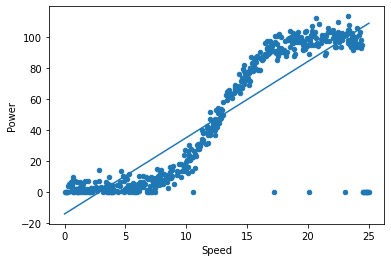

In [421]:
speedPower.plot.scatter(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]))
plt.xlabel("Speed")
plt.ylabel("Power")
plt.show()

## Remove the Zeroes

In [380]:
# The zeroes must be removed as they are outliers. This does remove the first row where 0 speed causes 0 power.
speedPower = pd.read_csv(speedPowerFile).query("power>0")
print(speedPower.shape)
speedPower

(451, 2)


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [381]:
speedPower.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


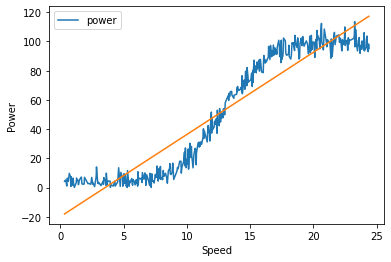

In [382]:
speedPower.plot(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]))
plt.xlabel("Speed")
plt.ylabel("Power")
plt.show()

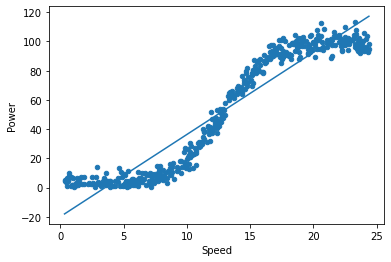

In [383]:
speedPower.plot.scatter(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]))
plt.xlabel("Speed")
plt.ylabel("Power")
plt.show()

# Prediction Using Linear Regression

In [324]:
X = speedPower.iloc[:, :-1].values
y = speedPower.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

-22.87778398825072
[5.79588728]


In [325]:
input = [[4.605]]
y_pred = regressor.predict(input)
print("Input is", input, "Prediction is", y_pred, "Actual is 13.592")

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Input is [[4.605]] Prediction is [3.81227696] Actual is 13.592
Mean Absolute Error: 0.7927230448923019
Mean Squared Error: 0.6284098259033225
Root Mean Squared Error 0.7927230448923019


In [326]:
input = [[22.072]]
y_pred = regressor.predict(input)
print("Input is", input, "Prediction is", y_pred, "Actual is 99.46")

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(input, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(input, y_pred))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(input, y_pred)))

Input is [[22.072]] Prediction is [105.04904015] Actual is 99.46
Mean Absolute Error: 82.97704014677794
Mean Squared Error: 6885.189191519998
Root Mean Squared Error 82.97704014677794


# Prediction Using K-Neighbours Regression

In [413]:
dataset = pd.read_csv("powerproduction.csv")
dataset.shape
dataset.describe()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [405]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(X, y)

print(neigh.predict([[10]]))

[17.7465]


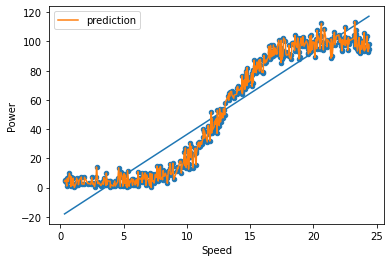

In [384]:
speedPower.plot.scatter(x = "speed", y = "power")
plt.plot(speedPower["speed"], np.poly1d(np.polyfit(speedPower["speed"], speedPower["power"], 1))(speedPower["speed"]))
plt.plot(speedPower["speed"], speedPower["power"], label="prediction")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.show()

#### References
[1] Machine Learning; https://www.ibm.com/cloud/learn/machine-learning
